In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# **visualize the training images and perform data wrangling to prepare the data**

Training Data Size: (33600, 28, 28, 1) 
Test Data Size: (8400, 28, 28, 1)


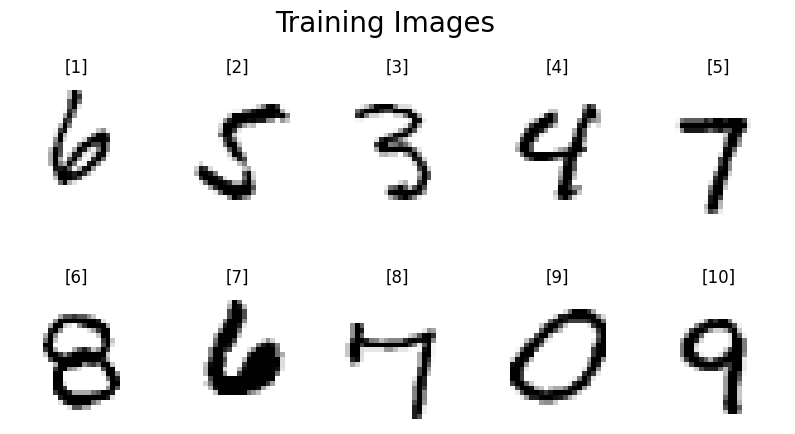

In [54]:
# Function to visualize the training images
def visualize_training_images(X_train):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))    ##Create subplots for displaying images
    axes = axes.flatten()
    for i in range(10):
        axes[i].imshow(X_train[i], cmap=plt.cm.binary)
        axes[i].set_title([i+1])
        axes[i].axis("off")
    plt.suptitle("Training Images", fontsize=20)
    plt.show()

def wrangle_data(train_csv_path):
    # Load the data
    train_df = pd.read_csv(train_csv_path)

    # Separate features and labels
    y = train_df['label']      # Extract labels
    X = train_df.drop(columns=['label'])    # Extract features by dropping the 'label' column

    # Preprocess the data
    X = X.values.reshape(-1, 28, 28, 1) / 255.0

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the sizes of training and testing data
    print(f"Training Data Size: {X_train.shape} \nTest Data Size: {X_test.shape}")

    # Visualize the training images
    visualize_training_images(X_train)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = wrangle_data('train.csv')

# **CNN Model**

In [21]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),    # Conv layer with 32 filters, kernel size (3, 3), ReLU activation, and input shape (28, 28, 1)
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),     # Flatten layer to convert 2D feature maps to 1D feature vectors
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/5
420/420 [==============================] - 25s 57ms/step - loss: 0.3068 - accuracy: 0.9097 - val_loss: 0.0863 - val_accuracy: 0.9762
Epoch 2/5
420/420 [==============================] - 24s 58ms/step - loss: 0.0746 - accuracy: 0.9766 - val_loss: 0.0624 - val_accuracy: 0.9805
Epoch 3/5
420/420 [==============================] - 30s 71ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0602 - val_accuracy: 0.9832
Epoch 4/5
420/420 [==============================] - 22s 52ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0482 - val_accuracy: 0.9845
Epoch 5/5
263/263 [==============================] - 3s 11ms/step - loss: 0.0386 - accuracy: 0.9865
Test Accuracy: 0.986547589302063
263/263 [==============================] - 2s 8ms/step
Confusion Matrix:
[[807   0   4   0   1   0   2   0   0   2]
 [  0 900   0   0   0   0   1   7   1   0]
 [  0   5 831   3   3   0   1   3   0   0]
 [  0   0   3 925   0   3   0   4   1   1]
 [  1   0   0   0 827   0   5   4   0   2]
 [  0  

# **Plot training and validation accuracy**

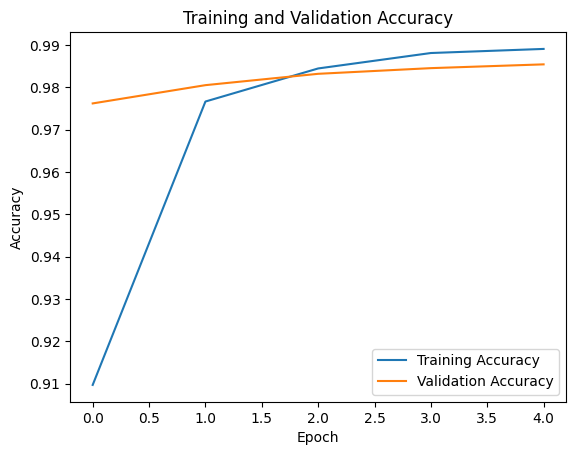

In [22]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# **Plot training and validation loss**

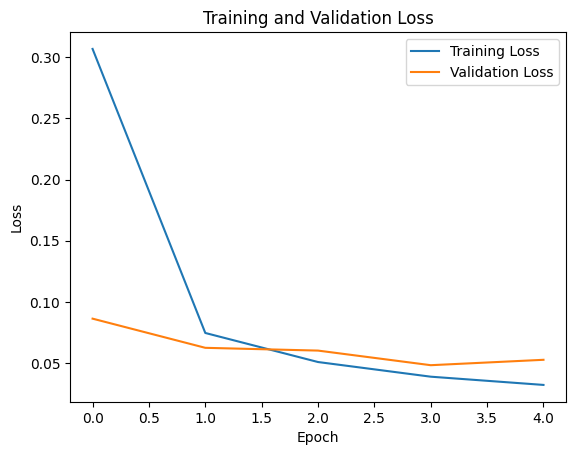

In [23]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

263/263 [==============================] - 5s 19ms/step


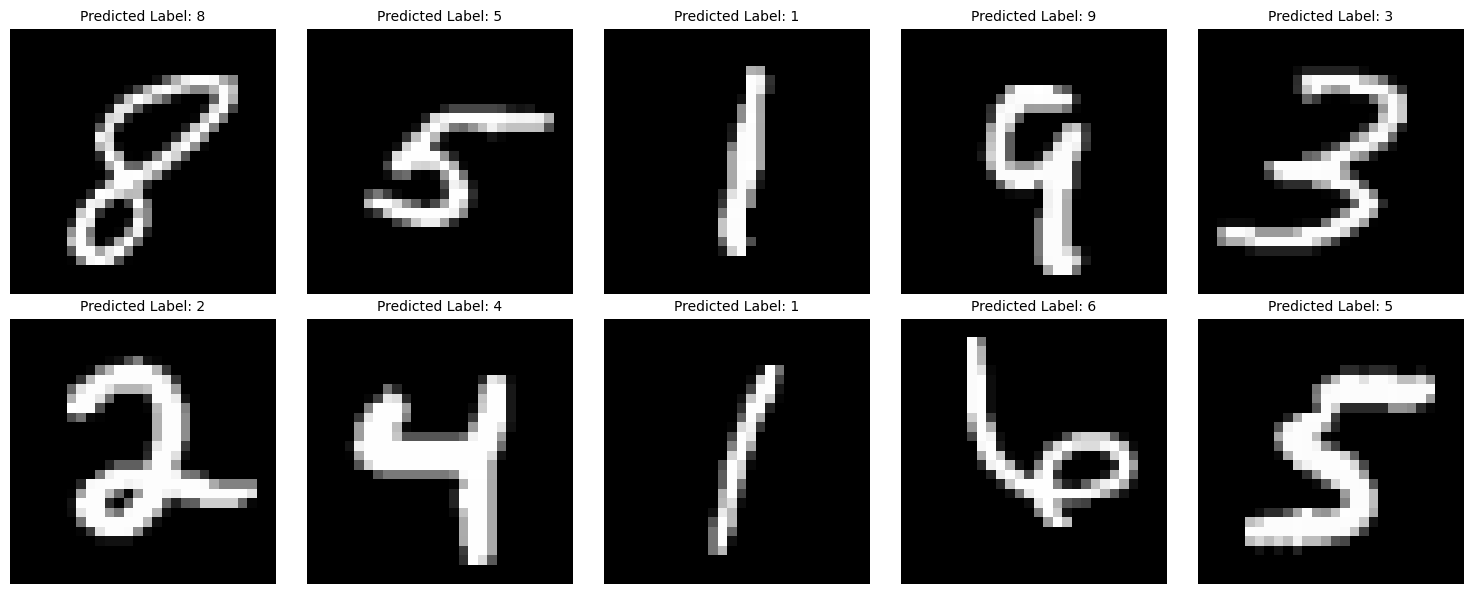

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)

# Visualize random predictions
num_random_indices = 10
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
for i, index in enumerate(np.random.choice(len(X_test), num_random_indices, replace=False)):
    image = X_test[index].squeeze()
    predicted_label = predicted_classes[index]
    ax = axes[i // 5, i % 5]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Predicted Label: {predicted_label}", fontsize=10)
    ax.axis('off')
plt.tight_layout()
plt.show()